In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath("../src"))
from model import BrainTumorCNN
from utils import get_dataloaders


In [3]:
def imshow(img, title):
    img = img * 0.5 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')


In [6]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load data
_, test_loader, class_names = get_dataloaders("../data/brain_tumor_dataset", batch_size=8)

# Load trained model
model = BrainTumorCNN(num_classes=4)
model.load_state_dict(torch.load("../cnn_model.pth", map_location=device))
model.eval()
model.to(device)


BrainTumorCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [7]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Get predictions
outputs = model(images)
_, preds = torch.max(outputs, 1)


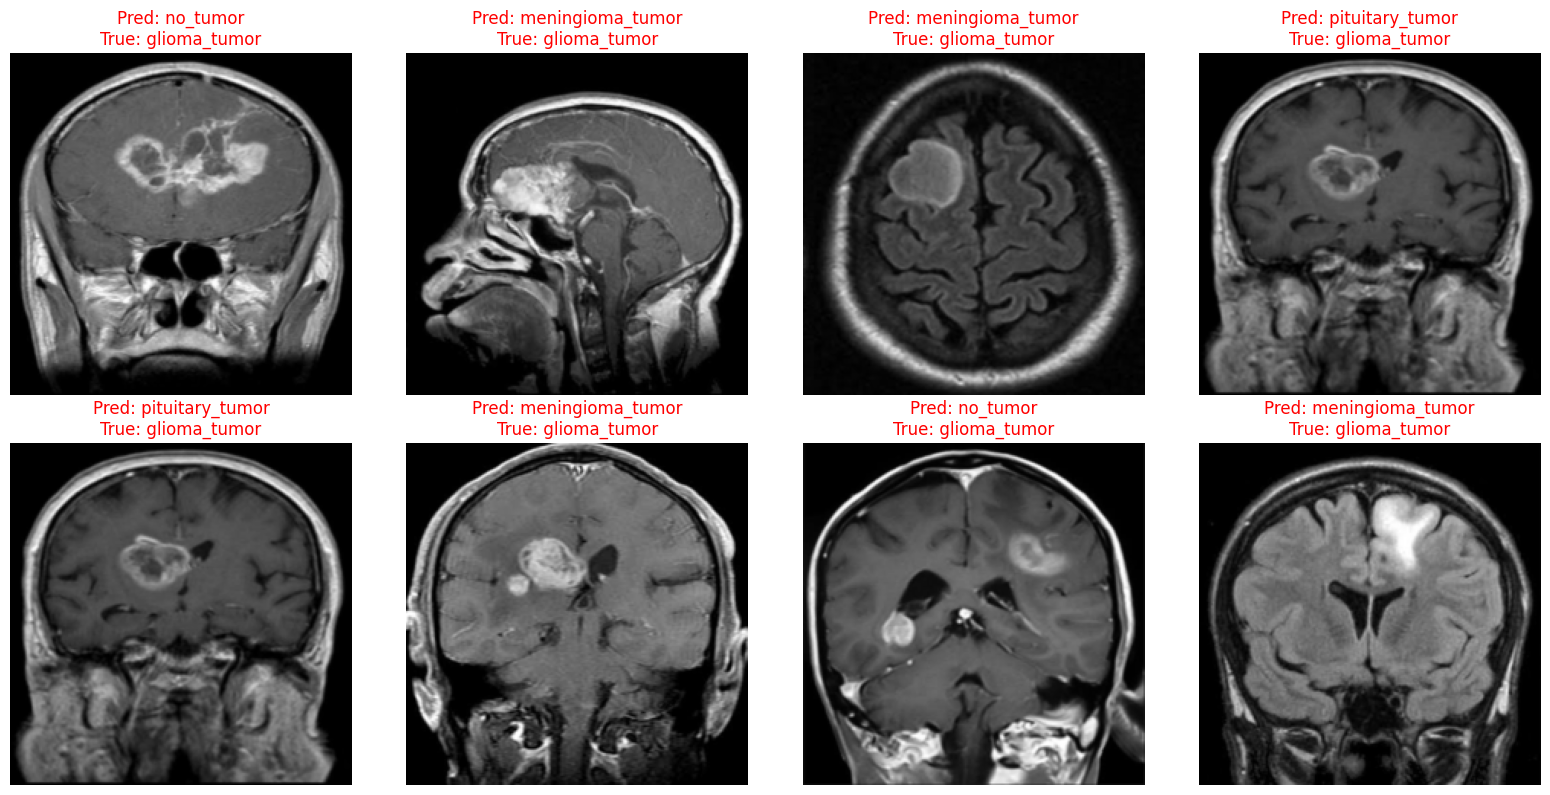

In [8]:
plt.figure(figsize=(16, 8))
for idx in range(8):
    plt.subplot(2, 4, idx+1)
    img = images[idx].cpu()
    true_label = class_names[labels[idx]]
    pred_label = class_names[preds[idx]]
    
    color = "green" if true_label == pred_label else "red"
    title = f"Pred: {pred_label}\nTrue: {true_label}"
    imshow(img.cpu(), title=title)
    plt.title(title, color=color)
plt.tight_layout()
plt.show()


In [9]:
import random


--- Batch 1 ---
True labels (index):      [1, 1, 1, 1, 1, 1, 1, 1]
Predicted labels (index): [1, 1, 1, 1, 1, 1, 1, 1]
True classes:             ['meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor']
Predicted classes:        ['meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor']


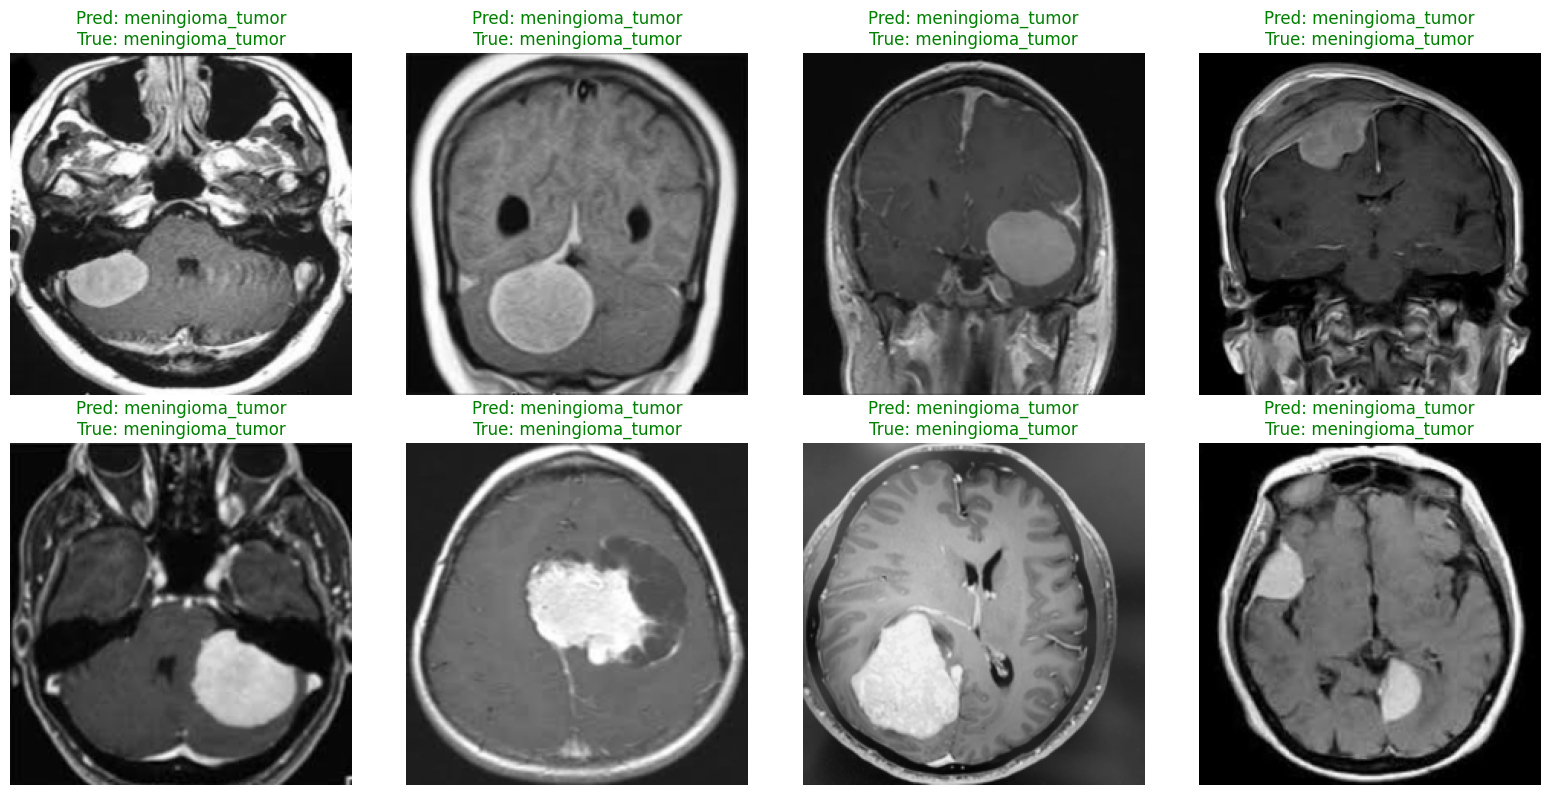


--- Batch 2 ---
True labels (index):      [1, 1, 1, 1, 1, 1, 1, 1]
Predicted labels (index): [1, 1, 1, 1, 1, 1, 1, 1]
True classes:             ['meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor']
Predicted classes:        ['meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor', 'meningioma_tumor']


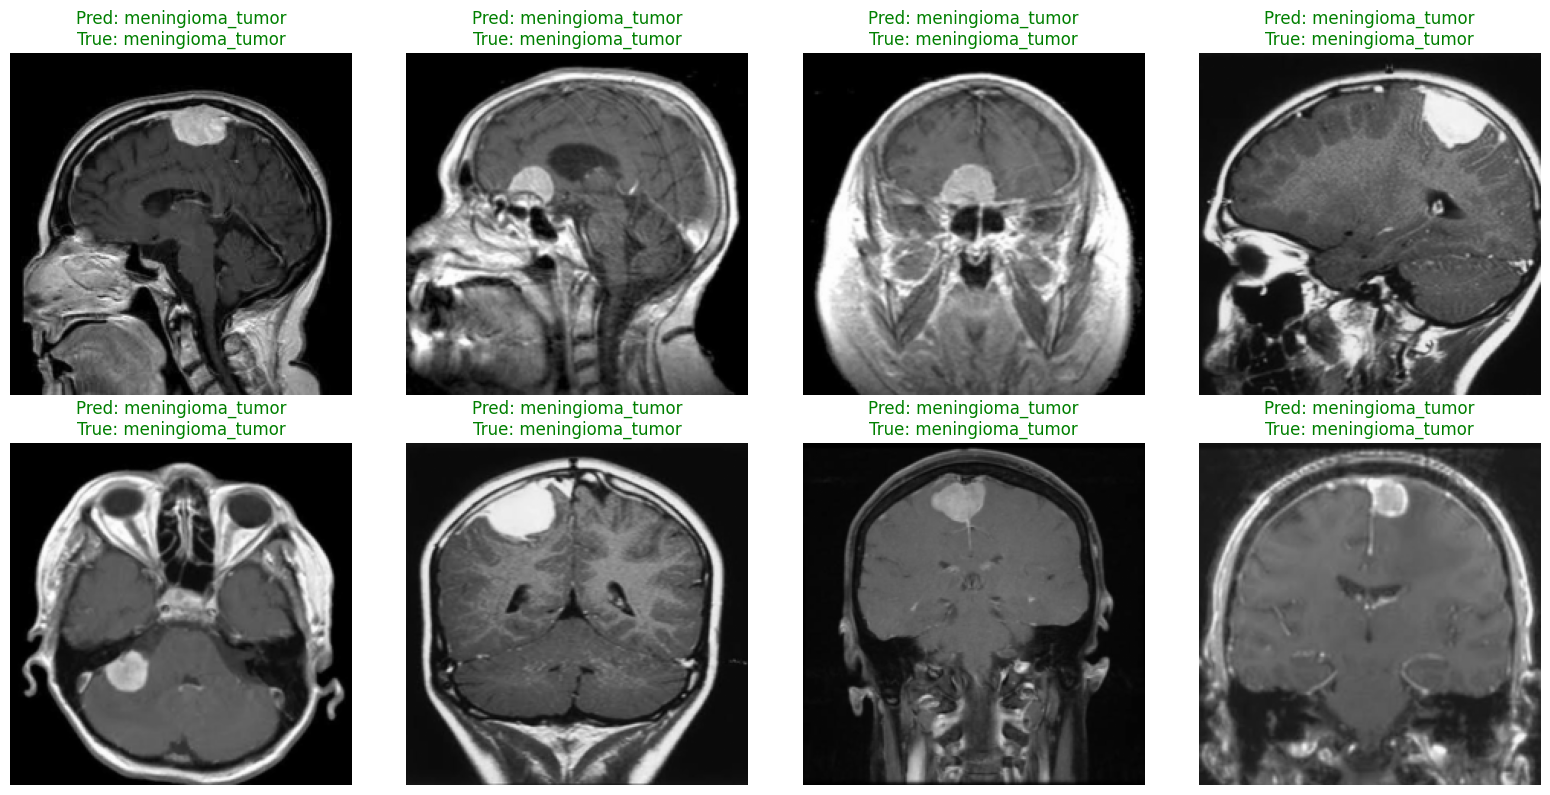


--- Batch 3 ---
True labels (index):      [3, 3, 3, 3, 3, 3, 3, 3]
Predicted labels (index): [3, 3, 3, 3, 2, 2, 3, 3]
True classes:             ['pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor']
Predicted classes:        ['pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor', 'no_tumor', 'no_tumor', 'pituitary_tumor', 'pituitary_tumor']


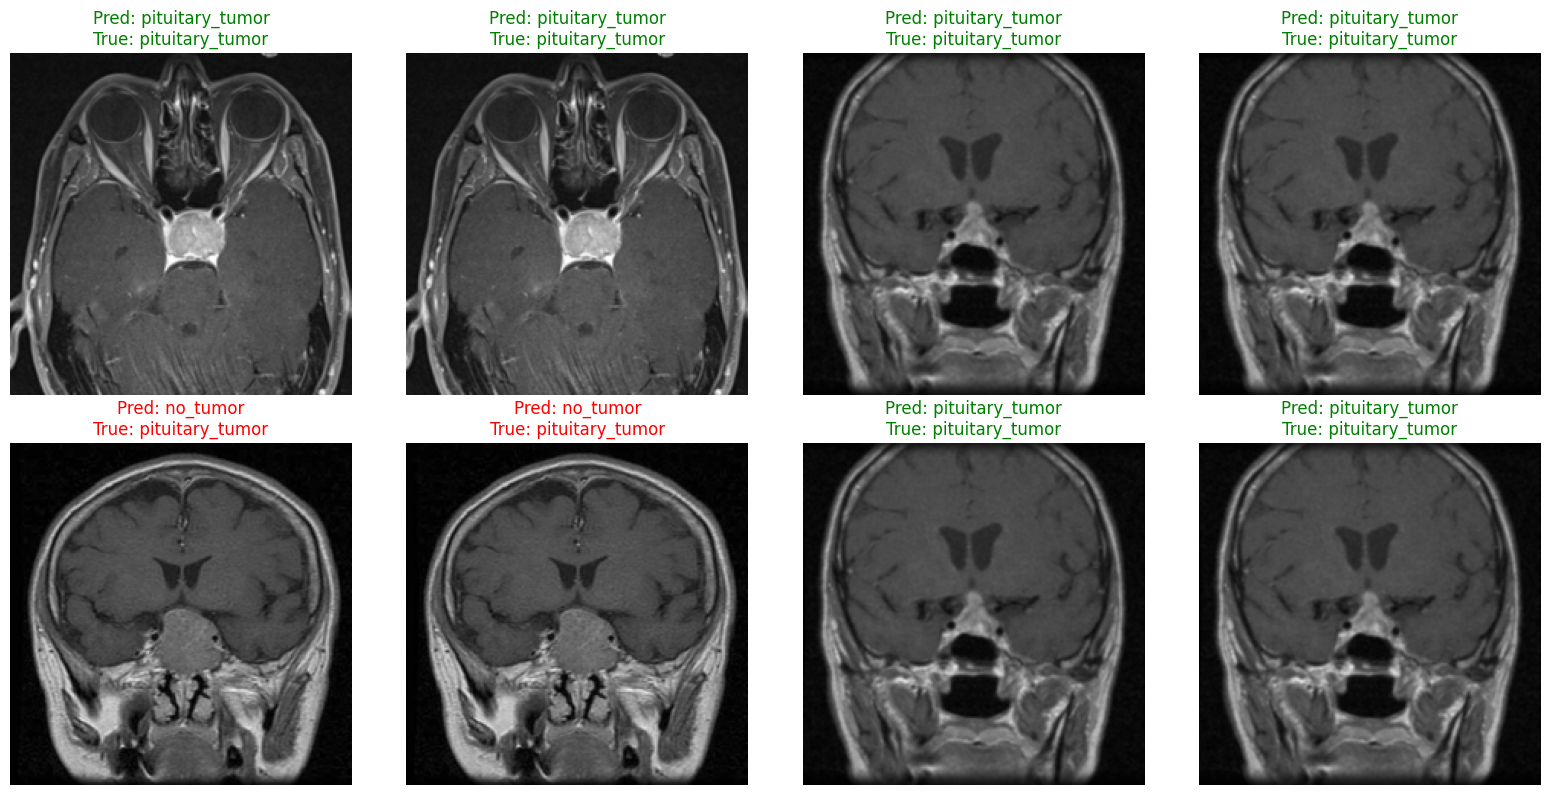

In [31]:
# Loop through 3 different random test batches
for batch_num in range(3):
    print(f"\n--- Batch {batch_num+1} ---")
    
    # Get a random batch from test set
    test_iter = iter(test_loader)
    for _ in range(random.randint(1, len(test_loader))):
        images, labels = next(test_iter)
    
    images, labels = images.to(device), labels.to(device)

    # Predict
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    # Print prediction info
    print("True labels (index):     ", labels.tolist())
    print("Predicted labels (index):", preds.tolist())
    print("True classes:            ", [class_names[i] for i in labels])
    print("Predicted classes:       ", [class_names[i] for i in preds])

    # Visualize
    plt.figure(figsize=(16, 8))
    for idx in range(len(images)):
        img = images[idx].cpu() * 0.5 + 0.5  # unnormalize
        npimg = img.numpy()

        true_label = class_names[labels[idx]]
        pred_label = class_names[preds[idx]]
        color = "green" if true_label == pred_label else "red"

        plt.subplot(2, 4, idx + 1)
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()